<a href="https://colab.research.google.com/github/goessgg/PROJETO-APLICADO---NETFLIX/blob/main/Notebooks/EDA_Assinantes_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importação dos Dados

Nessa seção será realizado a importação das bibliotecas em python necessárias para realização da análise exploratória da base de usuários da Netflix (kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset), além de realizar o upload da base de dados exportada no formato de .csv

## 1.1 Bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Database

In [6]:
# Carregar o dataset
file_path = 'Assinantes da Netflix.xlsx'
df = pd.read_excel(file_path)

# 2. Sanitização e Pré-EDA

Nessa seção será realizado a verificação da base de dados a ser explorada, tendo o foco de verificar: a presença de nulos e a presença de outliers; visando tornar os insights a serem extraídos coerentes e representativos da amostra de dados analisada.

Além disso, faremos uma exploração inicial do dataset, a fim de observar: a estrutura dos dados da amostra e o comportamento estatístico macro das variáveis a serem analisadas.

## 2.1 Presença de Nulos e Outliers

In [ ]:
# Verificar a presença de valores nulos
df.isnull().sum()

,0
ID,0
Tipo de assinatura,0
Valor da assinatura/mês,0
Data de adesão,0
Última data de pagamento,0
Meses de Ultilizados,0
País,0
Idade,0
Gênero,0
Dispositivo Utilizado,0


Não há nenhum elemento nulo na base de dados!

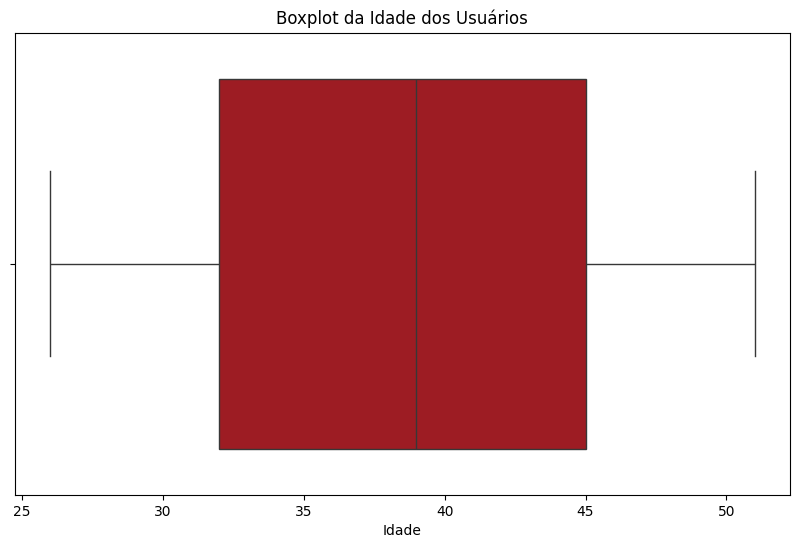

In [8]:
# Define a paleta personalizada
sns.set_palette(['#b20710', '#e50914','#f5f5f1'])

# Boxplot para verificar outliers na idade
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Idade')
plt.title('Boxplot da Idade dos Usuários')
plt.show()

- A base de dados não aparenta ter uma quantidade representativa de outliers fora dos extremos de 25 a 50 anos.
- Apresentando uma maior concentração dos dados entre 32 a 45 anos e com uma mediana em 38 anos.

## 2.2 Exploração inicial do Dataset

In [9]:
# Verificar as primeiras linhas do dataset
df.head()

,ID,Tipo de assinatura,Valor da assinatura/mês,Data de adesão,Última data de pagamento,Meses de Ultilizados,País,Idade,Gênero,Dispositivo Utilizado
0,1,Basic,39.9,2022-01-15,2023-06-10,1901-05-25,Estados Unidos,28,Homem,Smartphone
1,2,Premium,55.9,2021-09-05,2023-06-22,1901-10-16,Canada,35,Mulher,Tablet
2,3,Standard,18.9,2023-02-28,2023-06-27,1900-04-28,Reino Unido,42,Homem,Smart TV
3,4,Standard,18.9,2022-07-10,2023-06-26,1900-12-16,Australia,51,Mulher,Laptop
4,5,Basic,39.9,2023-05-01,2023-06-28,1900-02-27,Alemanha,33,Homem,Smartphone


In [10]:
# Verificar a estrutura do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2500 non-null   int64         
 1   Tipo de assinatura        2500 non-null   object        
 2   Valor da assinatura/mês   2500 non-null   float64       
 3   Data de adesão            2500 non-null   datetime64[ns]
 4   Última data de pagamento  2500 non-null   datetime64[ns]
 5   Meses de Ultilizados      2500 non-null   datetime64[ns]
 6   País                      2500 non-null   object        
 7   Idade                     2500 non-null   int64         
 8   Gênero                    2500 non-null   object        
 9   Dispositivo Utilizado     2500 non-null   object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 195.4+ KB


In [11]:
# Estatísticas descritivas básicas
df.describe()

,ID,Valor da assinatura/mês,Data de adesão,Última data de pagamento,Meses de Ultilizados,Idade
count,2500.00000,2500.000000,2500,2500,2500,2500.000000
mean,1250.50000,38.140000,2022-08-28 18:02:52.800000,2023-07-03 08:54:31.680000,1900-11-03 14:56:15.360000,38.795600
min,1.00000,18.900000,2021-09-05 00:00:00,2023-06-10 00:00:00,1900-01-08 00:00:00,26.000000
25%,625.75000,18.900000,2022-07-15 00:00:00,2023-06-29 00:00:00,1900-09-17 00:00:00,32.000000
50%,1250.50000,39.900000,2022-08-31 00:00:00,2023-07-03 00:00:00,1900-11-02 00:00:00,39.000000
75%,1875.25000,55.900000,2022-10-17 00:00:00,2023-07-08 00:00:00,1900-12-21 00:00:00,45.000000
max,2500.00000,55.900000,2023-06-14 00:00:00,2023-07-15 00:00:00,1901-10-16 00:00:00,51.000000
std,721.83216,14.405548,NaN,NaN,NaN,7.171778


In [18]:
# Definir uma função para calcular estatísticas adicionais
def calculate_additional_statistics(column):
    # Variância
    variance_sample = column.var(ddof=1)  # Variância amostral
    variance_population = column.var(ddof=0)  # Variância populacional
    std_dev_sample = column.std(ddof=1)  # Desvio padrão amostral
    std_dev_population = column.std(ddof=0)  # Desvio padrão populacional
    quartiles = column.quantile([0.25, 0.5, 0.75])

    return {
        'Variância Amostral': variance_sample,
        'Variância Populacional': variance_population,
        'Desvio Padrão Amostral': std_dev_sample,
        'Desvio Padrão Populacional': std_dev_population,
        'Quartis': quartiles
    }

# Calcular estatísticas adicionais para as colunas numéricas
monthly_revenue_stats = calculate_additional_statistics(df['Valor da assinatura/mês'])
age_stats = calculate_additional_statistics(df['Idade'])

# Mostrar resultados
print("\nEstatísticas Adicionais da Receita Mensal:")
for key, value in monthly_revenue_stats.items():
    print(f"{key}:\n{value}\n")

print("\nEstatísticas Adicionais da Idade dos Usuários:")
for key, value in age_stats.items():
    print(f"{key}:\n{value}\n")

descriptive_stats = df.describe()


Estatísticas Adicionais da Receita Mensal:
Variância Amostral:
207.51980792316363

Variância Populacional:
207.43679999999438

Desvio Padrão Amostral:
14.405547817530703

Desvio Padrão Populacional:
14.402666419798605

Quartis:
0.25    18.9
0.50    39.9
0.75    55.9
Name: Valor da assinatura/mês, dtype: float64


Estatísticas Adicionais da Idade dos Usuários:
Variância Amostral:
51.434394397759306

Variância Populacional:
51.4138206400002

Desvio Padrão Amostral:
7.171777631644703

Desvio Padrão Populacional:
7.170343132654128

Quartis:
0.25    32.0
0.50    39.0
0.75    45.0
Name: Idade, dtype: float64



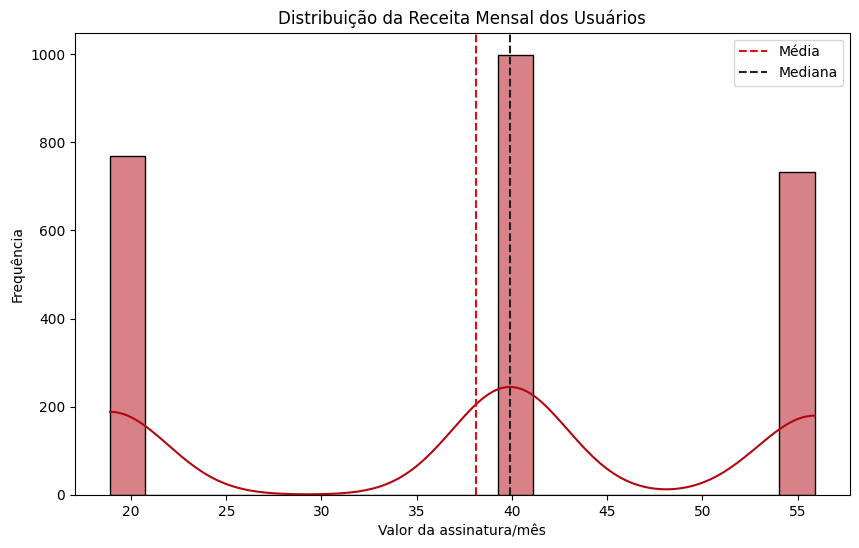

In [62]:
# Visualizar a distribuição da Receita Mensal
sns.set_palette(['#b20710', '#e50914','#221f1f'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Valor da assinatura/mês'], bins=20, kde = True)
plt.title('Distribuição da Receita Mensal dos Usuários')
plt.xlabel('Valor da assinatura/mês')
plt.ylabel('Frequência')
plt.axvline(descriptive_stats.loc['mean', 'Valor da assinatura/mês'], color='#e50914', linestyle='--', label='Média')
plt.axvline(descriptive_stats.loc['50%', 'Valor da assinatura/mês'], color='#221f1f', linestyle='--', label='Mediana')
plt.legend()
plt.show()


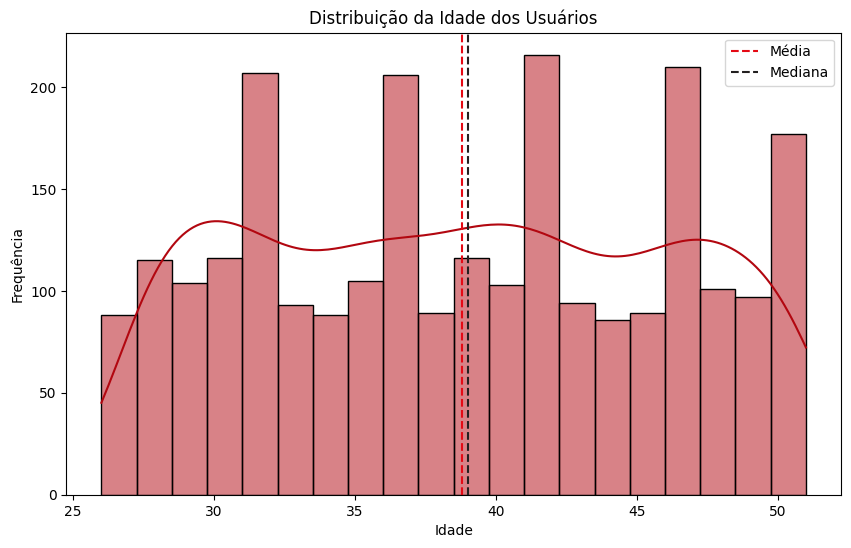

In [37]:
# Visualizar a distribuição da Idade
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.axvline(descriptive_stats.loc['mean', 'Idade'], color='#e50914', linestyle='--', label='Média')
plt.axvline(descriptive_stats.loc['50%', 'Idade'], color='#221f1f', linestyle='--', label='Mediana')
plt.legend()
plt.show()

# 3. Análise Exploratória

Nessa seção será verificada a distribuição dos usuários da Netflix conforme as seguintes segmentações: país, faixa etária e tipo de assinatura.

### 3.1 Distribuição de usuários por país

**Principais Insights**

- 1) EUA e Espanha se destacam como os países que apresentam o maior volume de usuários assinantes.
- 2) Aparentemente, há uma diferenciação entre os top 3 países em relação aos demais do top 10, de modo que se situam em patamares diferentes de volume de usuários assinantes.

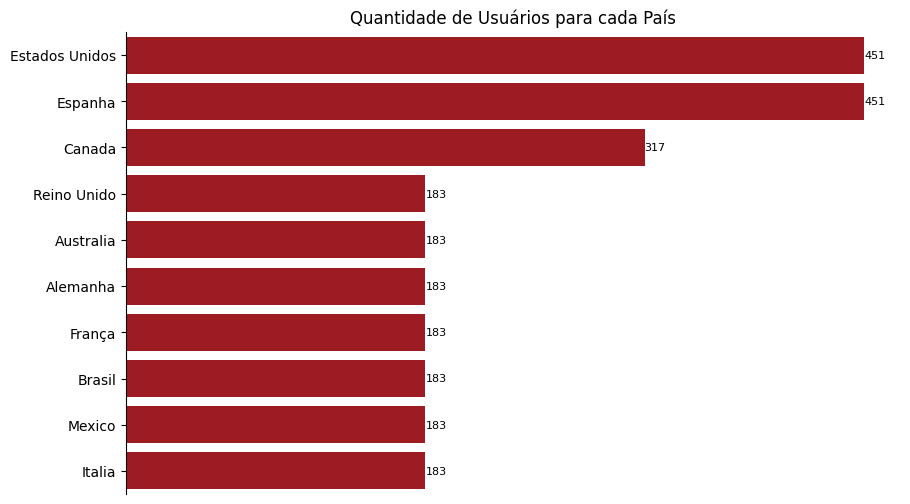

In [58]:
# Contar a quantidade de usuários por país
user_country_counts = df['País'].value_counts()

# Visualizar os países com mais usuários
plt.figure(figsize=(10, 6))
sns.barplot(x=user_country_counts.values, y=user_country_counts.index)
plt.title('Quantidade de Usuários para cada País')

# Remove a linha inferior e os ticks do eixo x
sns.despine()
ax = plt.gca()
ax.spines['bottom'].set_visible(False)
plt.xticks([])
plt.ylabel('')

# Adiciona rótulos de dados em cada barra
for i, v in enumerate(user_country_counts.values):
    plt.text(v, i, str(v), color='black', ha='left', va ='center', fontsize=8 )

plt.show()


### 3.2 Distribuição dos usuários por faixa etária

**Principais Insights**

- 1) Observa-se que 50 anos é a idade mais frequente dos usuários assinantes
- 2) Para as demais faixas etárias se observa um comportamento quase uniforme

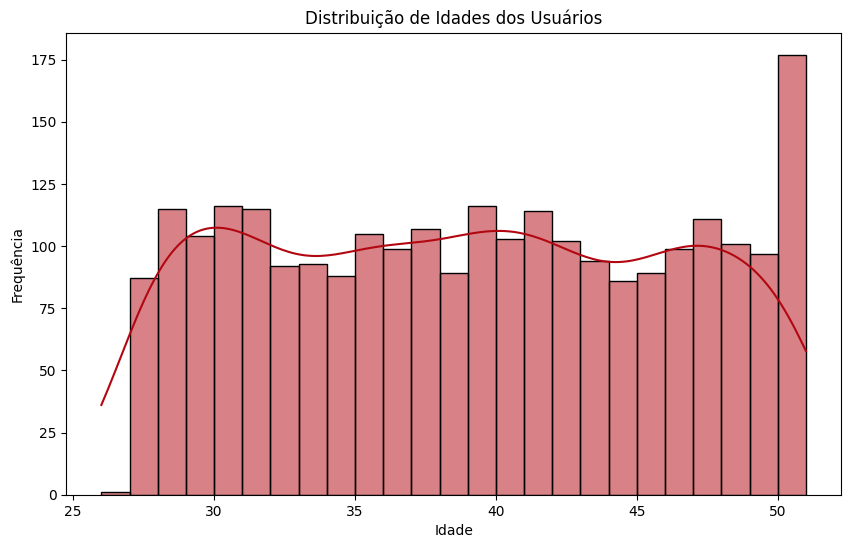

In [110]:
# Visualizar a distribuição de faixas etárias
sns.set_palette(['#b20710', '#e50914','#221f1f'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Idade'], binwidth=1, kde=True)
plt.title('Distribuição de Idades dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### 3.3 Distribuição de Usuários por Plano de Assinatura

**Principais Insights**

- 1) Plano Básico é o mais assinado entre os usuários
- 2) O plano premium e o plano standard apresentam uma quantidade de usuários semelhante (de modo que podemos dizer que temos dois tipos distintos de clientes e que são igualmente representativos a base de usuários)

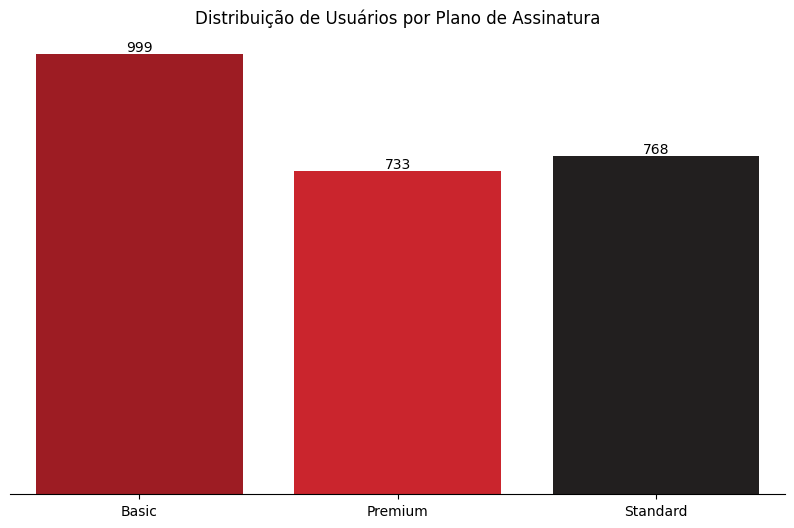

In [106]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Tipo de assinatura', hue='Tipo de assinatura', legend=False)
plt.title('Distribuição de Usuários por Plano de Assinatura')

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ay.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

plt.show()

### 3.4 Distribuição dos usuários por país e pela idade mais comum (moda da idade)

**Principais Insights**

- 1) Observa-se 2 perfis de usuários: jovens-adultos (entre 28 a 32 anos) e adultos (40 a 50 anos).
- 2) O perfil de jovens-adultos está concentrado no Brasil, Itália, Espanha e EUA.
- 3) O perfil de adultos está concentrado em países europeus e com destaque para o México que apresenta o público de assinantes mais velhos dentro desse perfil.

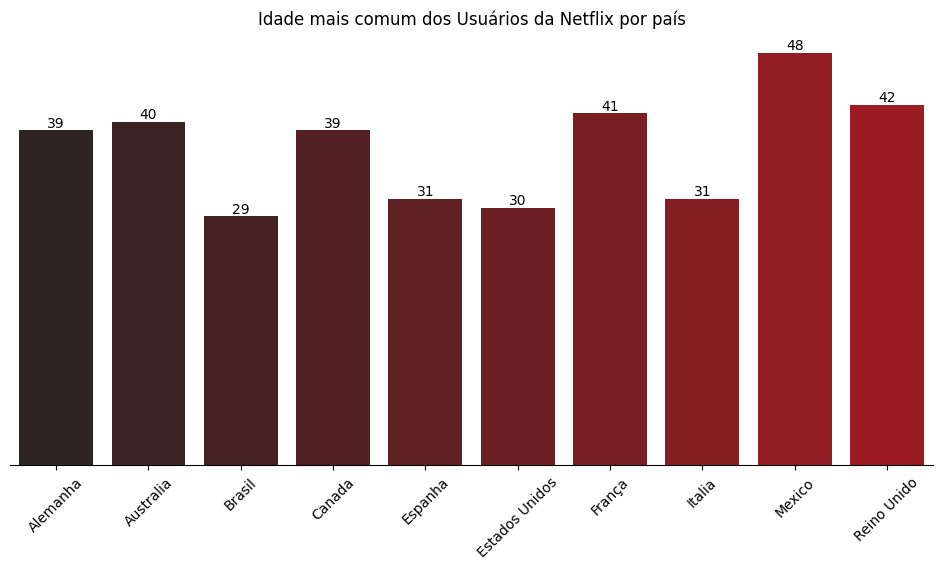

In [125]:
# Calcular a moda da idade dos usuários por país
moda_idade = df.groupby('País')['Idade'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Plotar o gráfico
plt.figure(figsize=(10,6))
ax = sns.barplot(data=moda_idade, x='País', y='Idade', hue='País', dodge=False, palette='dark:#b20710')
plt.title('Idade mais comum dos Usuários da Netflix por país')
plt.xticks(rotation=45)
plt.xlabel('País')
plt.ylabel('Moda da Idade do Usuário (em anos)')
plt.tight_layout()

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ay.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

plt.show()

### 3.5 Distribuição dos usuários por país e gênero

**Principais Insights**

- 1) Espanha e Brasil são os principais países que apresentam uma maior concentração de assinantes do gênero feminino do que masculino. Além de serem os países de maior preponderência de assinantes jovens-adultos.
- 2) México e Austrália são os principais países que apresentam uma maior concentração de assinantes do gênero masculino do que feminino. Além de serem os países de maior preponderência de assinantes adultos.

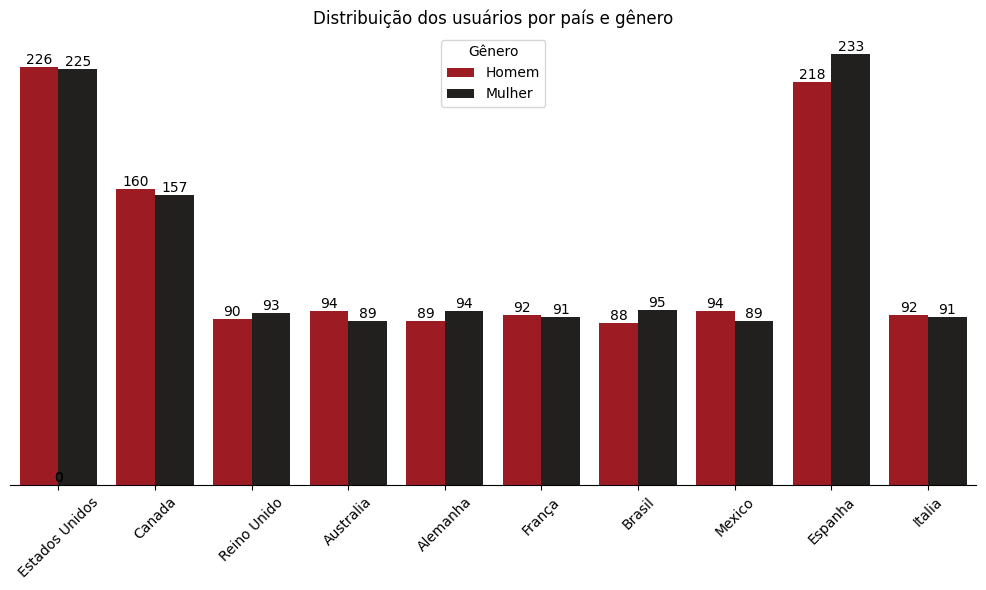

In [130]:
# Plotar o gráfico
sns.set_palette(['#b20710', '#221f1f'])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='País', hue='Gênero')

# Customizar o gráfico
plt.title('Distribuição dos usuários por país e gênero')
plt.ylabel('Quantidade de Usuários')
plt.xlabel('País')
plt.xticks(rotation=45)

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ay.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 3.6 Distribuição do tipo de assinatura por país

**Principais Insights**

- 1) Espanha e França: quantidade significativa de assinantes Premium.
- 2) Brasil: uma quantidade maior de usuários do plano Basic
- 3) Alemanha e Itália: alto número de assinantes Basic
- 4) Reino Unido e México: alta adesão da assinatura Standard
- 5) Estados Unidos e Canadá: distribuição equilibrada entre os planos

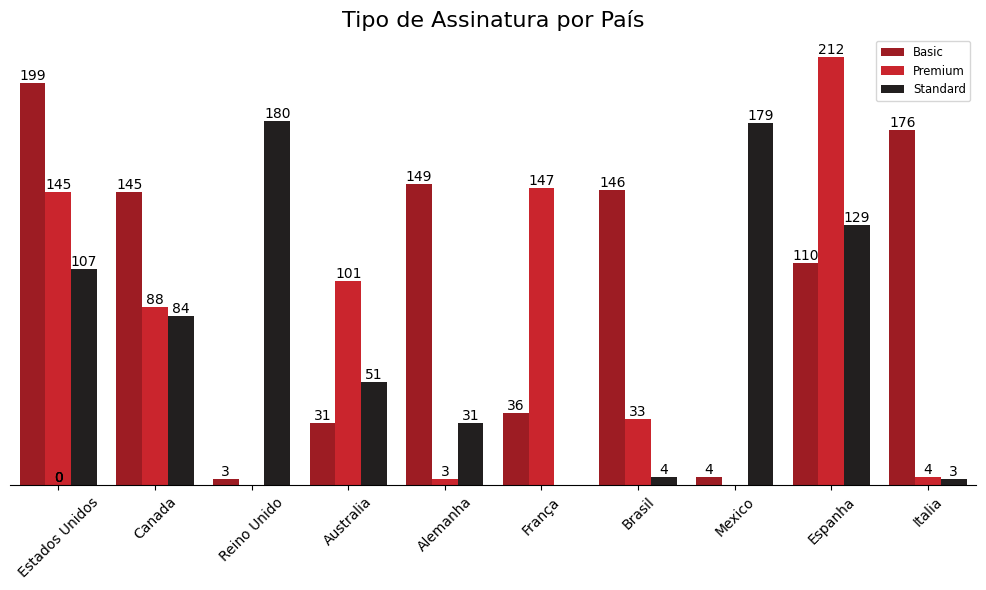

In [141]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de contagem por país e tipo de assinatura
sns.set_palette(['#b20710', '#e50914','#221f1f'])
ax = sns.countplot(x='País', hue='Tipo de assinatura', data=df)

# Configurar título
plt.title("Tipo de Assinatura por País", fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ay.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.legend(title='', fontsize='small')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 3.7 Distribuição dos usuários por gênero e tipo de assinatura

**Principais Insights**

- 1) Não se observa uma distinção significativa de gênero entre os tipos de assinatura

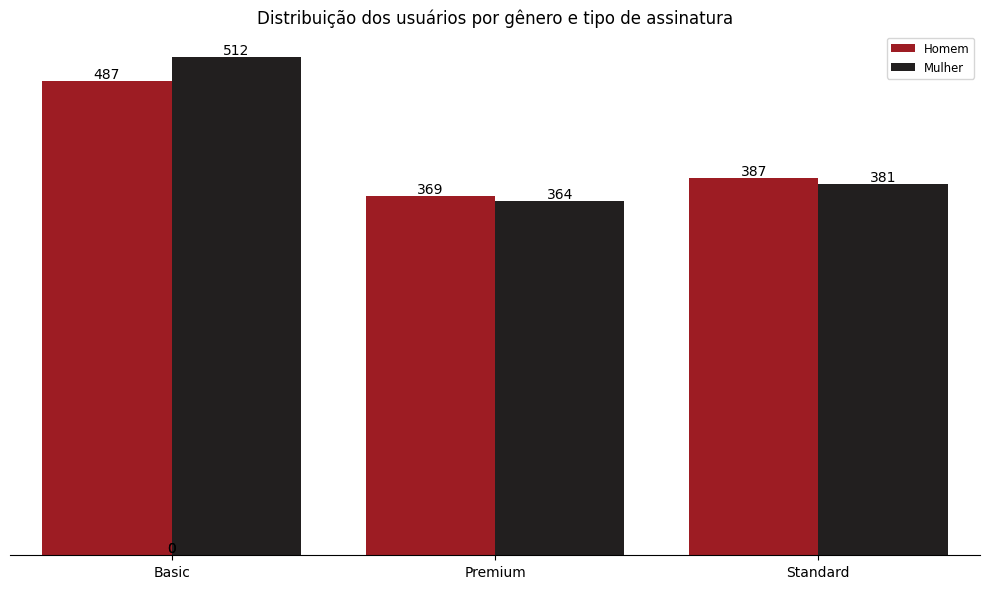

In [147]:
# Plotar o gráfico
sns.set_palette(['#b20710','#221f1f'])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Tipo de assinatura', hue='Gênero')

# Customizar o gráfico
plt.title('Distribuição dos usuários por gênero e tipo de assinatura')
plt.ylabel('Quantidade de Usuários')
plt.xlabel('Tipo de Assinatura')

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ay.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.legend(title='', fontsize='small')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### 3.8 Distribuição do Life Time Value (LTV) por País

**Principais Insights**

- Itália e o Reino Unido têm os maiores valores de LTV, o que pode indicar uma maior disposição dos usuários nesses países a gastar com o serviço. Já o México apresenta o menor valor.




In [148]:
# Calcular o LTV (média da receita mensal) por país
ltv_per_country = df.groupby('País')['Valor da assinatura/mês'].mean().reset_index()

# Renomear as colunas para melhor clareza
ltv_per_country.columns = ['País', 'Life Time Value (LTV)']

# Exibir a tabela com os dados do LTV por país
print(ltv_per_country)

             País  Life Time Value (LTV)
0        Alemanha              36.604918
1       Australia              42.878142
2          Brasil              42.326230
3          Canada              38.776972
4         Espanha              41.414412
5  Estados Unidos              40.061863
6          França              52.752459
7          Italia              39.905464
8          Mexico              19.359016
9     Reino Unido              19.244262


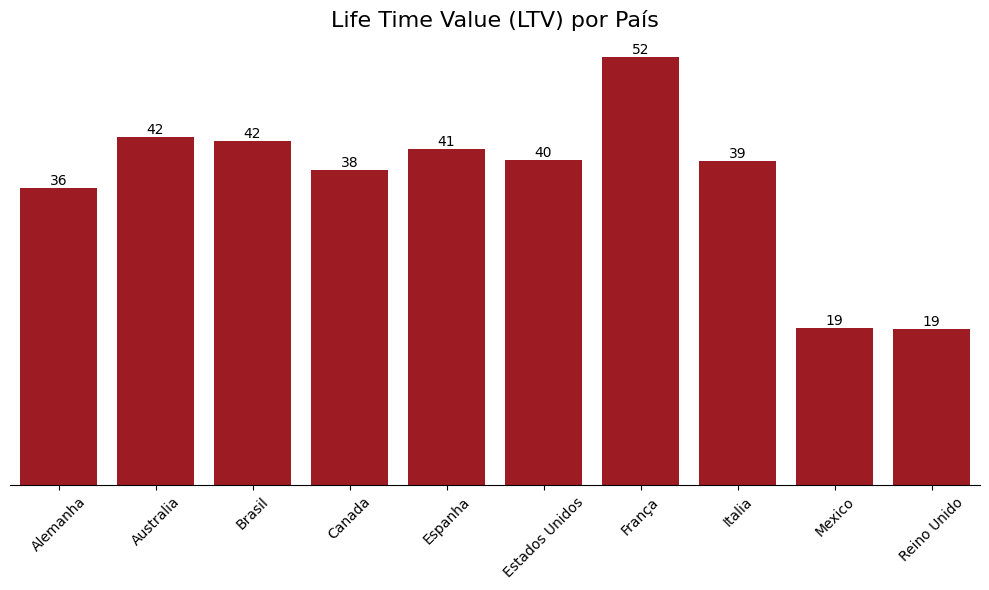

In [151]:
# Calcular o LTV (média da receita mensal)
sns.set_palette(['#b20710','#221f1f'])
ltv_per_country = df.groupby('País')['Valor da assinatura/mês'].mean()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
ax = sns.barplot(x=ltv_per_country.index, y=ltv_per_country.values)

# Configurar títulos e rótulos dos eixos
plt.title('Life Time Value (LTV) por País', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Life Time Value (LTV)', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

# Removendo a linha inferior e os ticks do eixo x
sns.despine(left=True)
ay.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_visible(True)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')

# Adicionando rótulos de dados (contagens) nas barras com cor preta
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', color='black', fontsize=10)

# Exibir o gráfico
plt.tight_layout()
plt.show()


# 4. Conclusão

**Key Insights**

- A princípio a análise revelou que os principais mercados da Netflix são compostos por uma base adulta, com preferência por planos mais acessíveis, como o Básico. Há uma uniformidade na distribuição de gênero e tipo de assinatura, o que sugere que as preferências dos usuários são bastante consistentes.

**Próximos Passos:**

- Storytelling dos Dados: Com base nesses insights, o próximo passo é desenvolver um data storytelling para ajudar a guiar as estratégias de marketing para atrais mais assinantes e expandir a atuação em novos mercados.

**Dificuldades encontradas**:

- A ausência de informações adicionais sobre o comportamento dos usuários (como tempo de visualização ou preferências de conteúdo) limitou a profundidade da análise.
- A análise não levou em conta aspectos culturais que podem influenciar o uso da plataforma em diferentes países.